In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv('College.csv')
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


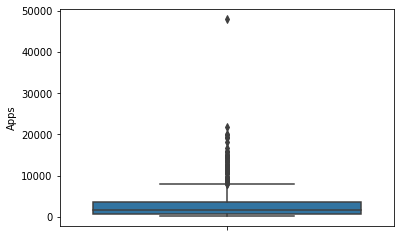

In [3]:
#18 Drop Outliers ในฟีเจอร์ Apps (การทำ Clustering ควรจะจัดการ Outliers ก่อนทุกครั้ง)
sns.boxplot(df['Apps'],orient='v')

In [4]:
df = df[df['Apps'] < 30000]
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [5]:
# drop non-numerical data column
df = df.iloc[:,2:]
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [6]:
#19 ทำ Min-Max Normalization ให้กับทุกฟีเจอร์ใน DataFrame
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

df_scaled = min_max_scaler.fit_transform(df)
df_scaled

array([[0.07268793, 0.06212511, 0.10791254, ..., 0.1875    , 0.0726714 ,
        0.46296296],
       [0.0969019 , 0.09918595, 0.07503539, ..., 0.25      , 0.13838671,
        0.42592593],
       [0.06200801, 0.05489503, 0.04734938, ..., 0.46875   , 0.10460535,
        0.40740741],
       ...,
       [0.09280486, 0.09870394, 0.10382256, ..., 0.3125    , 0.09683865,
        0.36111111],
       [0.48906689, 0.12751714, 0.20166745, ..., 0.765625  , 0.70126492,
        0.82407407],
       [0.13386733, 0.09549057, 0.10319333, ..., 0.4375    , 0.02494015,
        0.82407407]])

In [7]:
df = pd.DataFrame(data=df_scaled, columns = df.columns)
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.072688,0.062125,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,0.096902,0.099186,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,0.062008,0.054895,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,0.015467,0.014835,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,0.005156,0.003963,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0.097408,0.077281,0.079912,0.031579,0.186813,0.093639,0.092878,0.230217,0.334174,0.180036,0.145038,0.547368,0.473684,0.495979,0.218750,0.024186,0.277778
772,0.086452,0.092813,0.103823,0.242105,0.417582,0.086021,0.050653,0.474174,0.501261,0.224599,0.152672,0.684211,0.671053,0.289544,0.484375,0.113164,0.675926
773,0.092805,0.098704,0.103823,0.347368,0.571429,0.084243,0.007557,0.235537,0.381463,0.232175,0.081069,0.621053,0.671053,0.319035,0.312500,0.096839,0.361111
774,0.489067,0.127517,0.201667,0.989474,0.989011,0.161186,0.003755,0.903926,0.745586,0.237968,0.284733,0.926316,0.947368,0.088472,0.765625,0.701265,0.824074


In [8]:
#20 เลือกฟีเจอร์ Apps, Accept สร้าง 2-Means
data = df[['Apps','Accept']]
data

,Apps,Accept
0,0.072688,0.062125
1,0.096902,0.099186
2,0.062008,0.054895
3,0.015467,0.014835
4,0.005156,0.003963
...,...,...
771,0.097408,0.077281
772,0.086452,0.092813
773,0.092805,0.098704
774,0.489067,0.127517


In [9]:
data = np.array(data)
data

array([[0.07268793, 0.06212511],
       [0.0969019 , 0.09918595],
       [0.06200801, 0.05489503],
       ...,
       [0.09280486, 0.09870394],
       [0.48906689, 0.12751714],
       [0.13386733, 0.09549057]])

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans_label = kmeans.fit_predict(data)
kmeans_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
#21 หาค่า Cluster Centers, Inertia, n_iter
kmeans.cluster_centers_

array([[0.0756703 , 0.06238142],
       [0.46094979, 0.33847283]])

In [12]:
kmeans.inertia_

10.30138751442823

In [13]:
kmeans.n_iter_

9

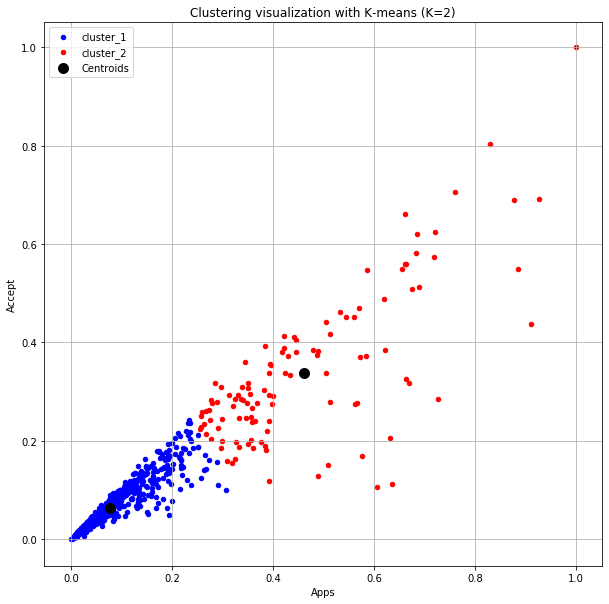

In [14]:
#22 สร้าง Clustering Visualization และจุด Centroids
x1 = data[kmeans_label == 0][:,0]
y1 = data[kmeans_label == 0][:,1]
x2 = data[kmeans_label == 1][:,0]
y2 = data[kmeans_label == 1][:,1]

plt.figure(figsize=(10,10))
plt.scatter(x1,y1, s=20, c='b', label='cluster_1')
plt.scatter(x2,y2, s=20, c='r', label='cluster_2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black',label='Centroids')
plt.title('Clustering visualization with K-means (K=2)')
plt.legend()
plt.xlabel('Apps')
plt.ylabel('Accept')
plt.grid()

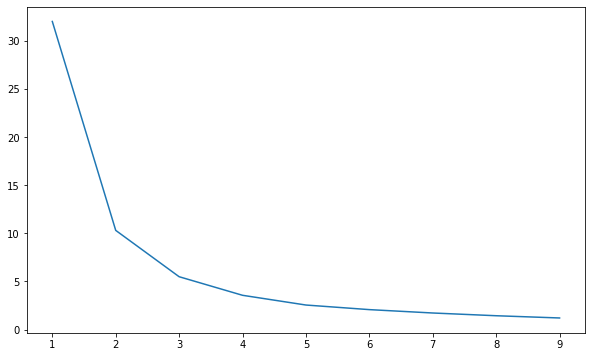

In [15]:
#23 สร้าง Elbow Method Visualization เพื่อหาค่า K ที่เหมาะสมที่สุด
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10), wcss)

In [16]:
# ANSWER:  K=4 เหมาะสมที่สุด

In [17]:
#24 ใช้ฟีเจอร์เดิมสร้าง K-Means ด้วยค่า K จากข้อ 23
kmeans = KMeans(n_clusters=4)
kmeans_label = kmeans.fit_predict(data)
kmeans_label

array([1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 0,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 3, 0, 1, 3, 3, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 3, 1, 1, 1, 0, 3, 1, 1, 1, 3, 1, 1, 3, 0,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 3, 0, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 0, 1, 3, 0, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1,
       0, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 0, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 3, 1, 2, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 0, 0,
       1, 0, 0, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 3, 1, 1, 0, 2, 1, 3, 0, 0, 0, 1, 3, 1, 3, 0, 1,
       1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,

In [18]:
#25 หาค่า Cluster Centers, Inertia, n_iter ด้วยค่า K จากข้อ 23 
kmeans.cluster_centers_

array([[0.37912497, 0.26866888],
       [0.0427217 , 0.03789162],
       [0.69150516, 0.53308876],
       [0.16525572, 0.12912918]])

In [19]:
kmeans.inertia_

3.5614803838382634

In [20]:
kmeans.n_iter_

7

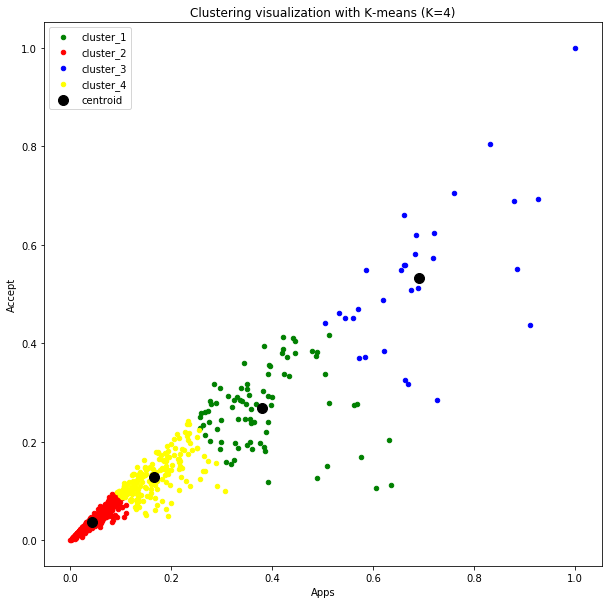

In [21]:
#26 สร้าง Clustering Visualization และจุด Centroids ด้วยค่า K จากข้อ 23
x1 = data[kmeans_label==0][:,0]
y1 = data[kmeans_label==0][:,1]
x2 = data[kmeans_label==1][:,0]
y2 = data[kmeans_label==1][:,1]
x3 = data[kmeans_label==2][:,0]
y3 = data[kmeans_label==2][:,1]
x4 = data[kmeans_label==3][:,0]
y4 = data[kmeans_label==3][:,1]

plt.figure(figsize=(10,10))
plt.scatter(x1,y1, s=20, c='green', label='cluster_1')
plt.scatter(x2,y2, s=20, c='red', label='cluster_2')
plt.scatter(x3,y3, s=20, c='blue', label='cluster_3')
plt.scatter(x4,y4, s=20, c='yellow', label='cluster_4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='centroid')
plt.title('Clustering visualization with K-means (K=4)')
plt.xlabel('Apps')
plt.ylabel('Accept')
plt.legend()

In [22]:
#27 เลือกฟีเจอร์ Top25perc, Outstate (เพราะค่า Correlation ใกล้ 0) สร้าง 2-Means
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.072688,0.062125,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,0.096902,0.099186,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,0.062008,0.054895,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,0.015467,0.014835,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,0.005156,0.003963,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0.097408,0.077281,0.079912,0.031579,0.186813,0.093639,0.092878,0.230217,0.334174,0.180036,0.145038,0.547368,0.473684,0.495979,0.218750,0.024186,0.277778
772,0.086452,0.092813,0.103823,0.242105,0.417582,0.086021,0.050653,0.474174,0.501261,0.224599,0.152672,0.684211,0.671053,0.289544,0.484375,0.113164,0.675926
773,0.092805,0.098704,0.103823,0.347368,0.571429,0.084243,0.007557,0.235537,0.381463,0.232175,0.081069,0.621053,0.671053,0.319035,0.312500,0.096839,0.361111
774,0.489067,0.127517,0.201667,0.989474,0.989011,0.161186,0.003755,0.903926,0.745586,0.237968,0.284733,0.926316,0.947368,0.088472,0.765625,0.701265,0.824074


In [23]:
data = df[['Top25perc','Outstate']]
data = np.array(data)
data

array([[0.47252747, 0.26342975],
       [0.21978022, 0.51342975],
       [0.45054945, 0.46022727],
       ...,
       [0.57142857, 0.23553719],
       [0.98901099, 0.90392562],
       [0.59340659, 0.13688017]])

In [24]:
kmeans = KMeans(n_clusters=2)
kmeans_label = kmeans.fit_predict(data)
kmeans_label

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [25]:
#28 หาค่า Cluster Centers, Inertia, n_iter
kmeans.cluster_centers_

array([[0.72074756, 0.60809386],
       [0.3945323 , 0.30925637]])

In [26]:
kmeans.inertia_

34.93218752410897

In [27]:
kmeans.n_iter_

9

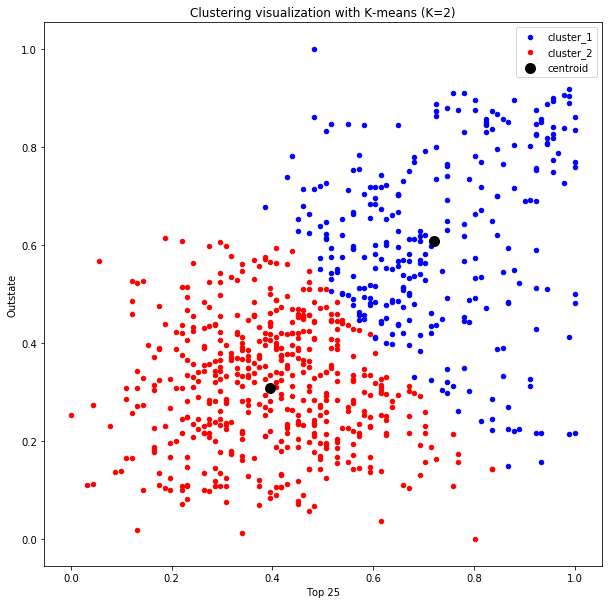

In [28]:
#29 สร้าง Clustering Visualization และจุด Centroids
x1 = data[kmeans_label==0][:,0]
y1 = data[kmeans_label==0][:,1]
x2 = data[kmeans_label==1][:,0]
y2 = data[kmeans_label==1][:,1]

plt.figure(figsize=(10,10))
plt.scatter(x1,y1, s=20, c='b', label='cluster_1')
plt.scatter(x2,y2, s=20, c='r', label='cluster_2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='centroid')
plt.title('Clustering visualization with K-means (K=2)')
plt.xlabel('Top 25')
plt.ylabel('Outstate')
plt.legend()

Text(0.5, 1.0, 'Elbow method')

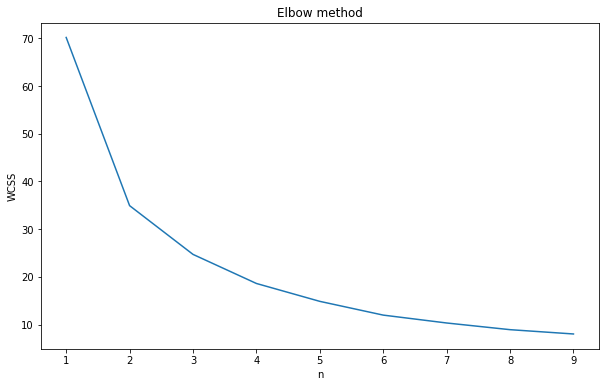

In [29]:
#30 สร้าง Elbow Method Visualization เพื่อหาค่า K ที่เหมาะสมที่สุด
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10), wcss)
plt.xlabel('n')
plt.ylabel('WCSS')
plt.title('Elbow method')

In [30]:
# Answer: K ที่เหมาะสม = 6

In [31]:
kmeans = KMeans(n_clusters=6)
kmeans_label = kmeans.fit_predict(data)
kmeans_label

array([5, 3, 3, 1, 5, 2, 3, 2, 2, 3, 4, 4, 5, 2, 5, 0, 4, 3, 3, 5, 2, 5,
       3, 5, 1, 5, 2, 5, 3, 2, 2, 1, 3, 5, 2, 3, 4, 4, 3, 5, 2, 5, 3, 5,
       2, 0, 0, 4, 2, 5, 3, 3, 0, 0, 1, 5, 5, 0, 3, 4, 4, 5, 3, 2, 4, 3,
       0, 3, 3, 1, 4, 4, 4, 2, 2, 3, 3, 2, 1, 5, 5, 5, 5, 3, 2, 5, 4, 4,
       2, 5, 3, 4, 0, 3, 2, 3, 2, 5, 3, 5, 3, 2, 0, 0, 5, 0, 1, 2, 2, 2,
       1, 3, 0, 5, 4, 2, 3, 2, 5, 0, 2, 3, 4, 4, 2, 5, 3, 3, 3, 2, 2, 2,
       3, 5, 3, 0, 2, 4, 1, 2, 4, 5, 0, 2, 4, 3, 0, 1, 5, 4, 2, 2, 2, 5,
       5, 3, 3, 3, 4, 4, 3, 5, 2, 4, 4, 0, 1, 3, 0, 3, 3, 2, 4, 5, 4, 2,
       5, 0, 0, 3, 5, 0, 3, 3, 2, 2, 2, 3, 3, 0, 5, 4, 1, 1, 2, 5, 2, 0,
       3, 5, 2, 1, 5, 1, 5, 2, 0, 0, 3, 1, 3, 5, 1, 2, 2, 0, 3, 2, 3, 4,
       5, 4, 1, 0, 5, 4, 0, 2, 2, 3, 2, 3, 3, 5, 3, 0, 3, 4, 1, 3, 2, 2,
       4, 2, 3, 5, 5, 0, 1, 2, 4, 4, 5, 1, 2, 2, 2, 2, 2, 2, 2, 1, 5, 3,
       0, 0, 3, 5, 2, 0, 4, 3, 5, 0, 1, 3, 3, 5, 2, 1, 0, 0, 5, 2, 4, 0,
       3, 2, 5, 3, 0, 5, 4, 3, 3, 5, 4, 3, 2, 2, 0,

In [32]:
#31 ใช้ฟีเจอร์เดิมสร้าง K-Means ด้วยค่า K จากข้อ 30 
x1 = data[kmeans_label==0][:,0]
y1 = data[kmeans_label==0][:,1]
x2 = data[kmeans_label==1][:,0]
y2 = data[kmeans_label==1][:,1]
x3 = data[kmeans_label==2][:,0]
y3 = data[kmeans_label==2][:,1]
x4 = data[kmeans_label==3][:,0]
y4 = data[kmeans_label==3][:,1]
x5 = data[kmeans_label==4][:,0]
y5 = data[kmeans_label==4][:,1]
x6 = data[kmeans_label==5][:,0]
y6 = data[kmeans_label==5][:,1]

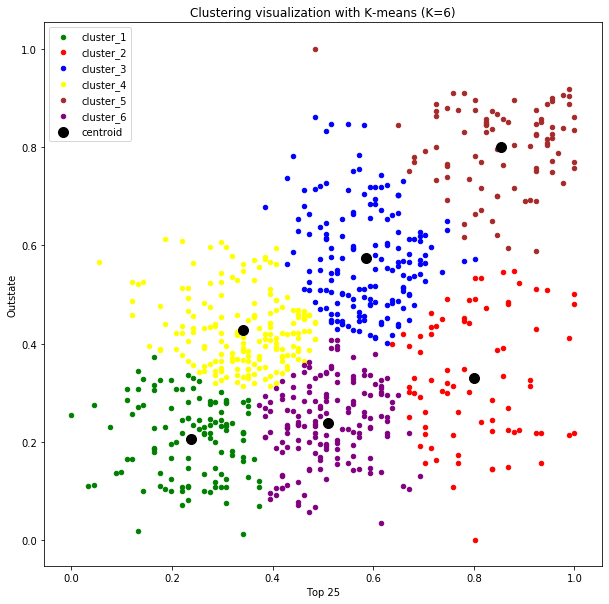

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(x1,y1, s=20, c='green', label='cluster_1')
plt.scatter(x2,y2, s=20, c='red', label='cluster_2')
plt.scatter(x3,y3, s=20, c='blue', label='cluster_3')
plt.scatter(x4,y4, s=20, c='yellow', label='cluster_4')
plt.scatter(x5,y5, s=20, c='brown', label='cluster_5')
plt.scatter(x6,y6, s=20, c='purple', label='cluster_6')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='centroid')
plt.title('Clustering visualization with K-means (K=6)')
plt.xlabel('Top 25')
plt.ylabel('Outstate')
plt.legend()